In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
# 確定資料內容以及前處理、特徵工程是否完成
pda = pd.read_csv('./data/feature_without_log_data.csv')
print(pda.head())
print(pda.columns)

C:\Users\User\.conda\envs\python39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\User\.conda\envs\python39\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\User\.conda\envs\python39\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


   popularity  year  danceability  energy  key  loudness  mode  speechiness  \
0          68  2012         0.483   0.303    4 -0.225345     1    -0.470752   
1          50  2012         0.572   0.454    3 -0.265704     1    -0.684458   
2          57  2012         0.409   0.234    3 -0.871970     1    -0.603225   
3          58  2012         0.392   0.251   10 -0.187641     1    -0.553235   
4          54  2012         0.430   0.791    6  0.595815     0    -0.629469   

   acousticness  instrumentalness  ...  gn_other  gn_pop  gn_reggae  gn_rock  \
0      1.108712         -0.677283  ...         0       0          0        0   
1      0.483289         -0.677245  ...         0       0          0        0   
2      0.082673         -0.677145  ...         0       0          0        0   
3      1.434392         -0.677283  ...         0       0          0        0   
4     -0.682244         -0.623949  ...         0       0          0        0   

   gn_world_music  ts_0  ts_1  ts_3  ts_4  t

In [2]:
from sklearn import preprocessing

In [ ]:
print(pda['liveness'])

In [3]:
# 年份無法放進去模型跑，先不用它，要用的話要另外編碼
print('drop a column')
pda = pda.drop(['year'], axis=1)
print(pda)
print(pda.columns)

drop a column
        popularity  danceability  energy  key  loudness  mode  speechiness  \
0               68         0.483   0.303    4 -0.225345     1    -0.470752   
1               50         0.572   0.454    3 -0.265704     1    -0.684458   
2               57         0.409   0.234    3 -0.871970     1    -0.603225   
3               58         0.392   0.251   10 -0.187641     1    -0.553235   
4               54         0.430   0.791    6  0.595815     0    -0.629469   
...            ...           ...     ...  ...       ...   ...          ...   
997558           7         0.551   0.728    9  0.332952     0    -0.563233   
997559           4         0.373   0.742   10  0.412784     0    -0.087081   
997560           3         0.516   0.675    7  0.211875     0    -0.599476   
997561           2         0.491   0.440    5  0.048316     1    -0.664462   
997562           3         0.782   0.861    1  0.264271     0     0.555287   

        acousticness  instrumentalness  liveness 

In [ ]:
# print(pda[pda['danceability'] > 1])
# print(pda[pda['danceability'] < -1])
# print(pda[pda['energy'] > 1])
# print(pda[pda['energy'] < -1])
# print(pda[pda['key'] > 1])
# print(pda[pda['key'] < -1])

In [6]:
# 1.svr模型
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# x_train = pda['']
# scaler = preprocessing.MinMaxScaler().fit(x_train)
# x_train = scaler.transform(x_train)

In [16]:
X = pda.iloc[:, 1:]
y = pda.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_test.shape)
print(y_test.shape)

(199513, 32)
(199513,)


In [10]:
svr = SVR(kernel='rbf', C=1.0, epsilon=0.2)
svr.fit(X_train, y_train)

SVR(epsilon=0.2)

In [15]:
y_pred = svr.predict(X_test)

ValueError: x and y must be the same size

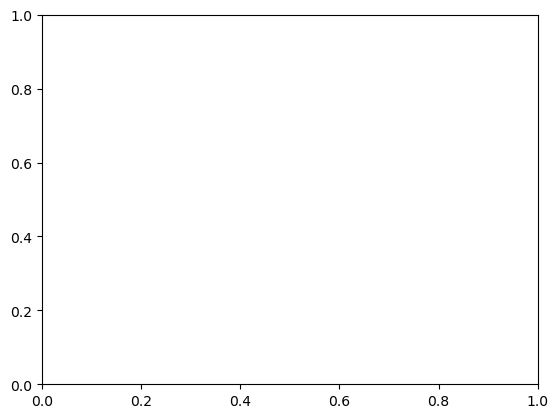

In [14]:
plt.scatter(X_test, y_test, color='darkorange', label='data')
plt.plot(X_test, y_pred, color='navy', lw=2, label='SVR (RBF kernel)')
plt.xlabel('data')
plt.ylabel('target')
plt.title('SVR Regression')
plt.legend()
plt.show()